In [5]:
# Part 1
import numpy as np
xmin=1.2345
xmax=2.3445
nSteps=17
a=(xmax-xmin)/nSteps
x=np.zeros(nSteps)
for i in range(0,nSteps):
    if i!=0 and i !=nSteps-1:
        x[i]=x[i-1]+a
    else:
        if i==0:
            x[i]=xmin
        else:
            x[i]=xmax
print(x)

[ 1.2345      1.29979412  1.36508824  1.43038235  1.49567647  1.56097059
  1.62626471  1.69155882  1.75685294  1.82214706  1.88744118  1.95273529
  2.01802941  2.08332353  2.14861765  2.21391176  2.3445    ]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
H=np.loadtxt('topography_180x360_grid.txt')

In [7]:
# From Lab

areaOcean=0.0
volumeOcean=0.0
area=0
phi=np.zeros(180)
R=6.378e6 #radius of earth in meters
for i in range(0,H.shape[0]):
    lat1=90-i
    lat2=90-(i+1)
    lat=(lat1+lat2)/2.0
    #print(lat)
    theta=90-lat
    for j in range(0,360):
        long=j
        dx=2*np.pi*R/360
        dy=np.pi*R/180
        patch=dx*dy*np.sin(np.radians(theta))
        if (H[i,j]<=0.0):
            areaOcean=areaOcean+patch
            volumeOcean=volumeOcean+patch*np.abs(H[i,j])
        area=area+patch
print(area,areaOcean/area,volumeOcean)

5.11192420753e+14 0.711221385218 1.33966730049e+18


In [8]:
# Part II (1)

area=0
NewOceanArea=0.0
NewOceanVolume=0.0
for i in range(0,H.shape[0]):
    lat1=90-i
    lat2=90-(i+1)
    lat=(lat1+lat2)/2.0
    theta=90-lat
    for j in range(0,360):
        long=j
        dx=2*np.pi*R/360
        dy=np.pi*R/180
        patch=dx*dy*np.sin(np.radians(theta))
        if (H[i,j]<=-1700):
            NewOceanArea=NewOceanArea+patch
            NewOceanVolume=NewOceanVolume+patch*(np.abs(H[i,j])-1700)
        area=area+patch
#print(NewOceanArea,NewOceanVolume/volumeOcean)
print('The new ocean volume would be ',NewOceanVolume,"meters cubed")
print('It decreased by',100-NewOceanVolume/volumeOcean*100,'%')

The new ocean volume would be  7.83814087856e+17 meters cubed
It decreased by 41.4918847712 %


In [9]:
# Part II (2)

area=0
NewOceanArea=0.0
NewOceanVolume=0.0
for i in range(0,H.shape[0]):
    lat1=90-i
    lat2=90-(i+1)
    lat=(lat1+lat2)/2.0
    #print(lat)
    theta=90-lat
    for j in range(0,360):
        long=j
        dx=2*np.pi*R/360
        dy=np.pi*R/180
        patch=dx*dy*np.sin(np.radians(theta))
        if (H[i,j]<=600):
            NewOceanArea=NewOceanArea+patch
            NewOceanVolume=NewOceanVolume+patch*(np.abs(H[i,j])+600)
        area=area+patch
#print(NewOceanArea,NewOceanVolume,NewOceanArea/area)
print(NewOceanArea/area*100,'% covered in ocean.')

88.5706859469 % covered in ocean.


In [10]:
# Part II (3)

area=0
NewOceanArea=0.0
NewOceanVolume=0.0
changeSealvl=0.0
for k in range(423,433):
    area=0
    NewOceanArea=0.0
    NewOceanVolume=0.0
    for i in range(0,H.shape[0]):
        lat1=90-i
        lat2=90-(i+1)
        lat=(lat1+lat2)/2.0
        theta=90-lat
        for j in range(0,360):
            long=j
            dx=2*np.pi*R/360
            dy=np.pi*R/180
            patch=dx*dy*np.sin(np.radians(theta))
            if (H[i,j]<=k):
                NewOceanArea=NewOceanArea+patch
                NewOceanVolume=NewOceanVolume+patch*(np.abs(H[i,j])+k)
            area=area+patch
    if (NewOceanVolume/volumeOcean)<=1.1501 and (NewOceanVolume/volumeOcean)>=1.1499:
        changeSealvl=k
print(changeSealvl,'meters')


428 meters


In [11]:
import matplotlib.pyplot as plt

In [12]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;

In [13]:
CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
print(CAC.shape,CAB.shape)

(1282, 2) (1295, 2)


In [14]:
CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

In [15]:
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate.shape)

(925, 2)


In [16]:
#lat_UCB = 37+52/60+19.54/3600;
#lat_LAX = 33+56/60+38.89/3600;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

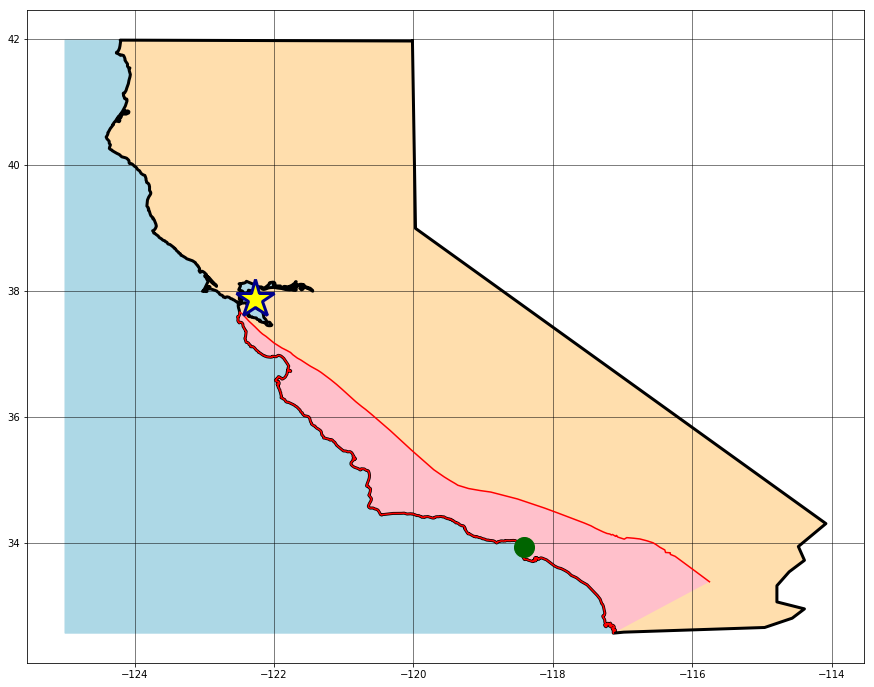

In [17]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')


plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

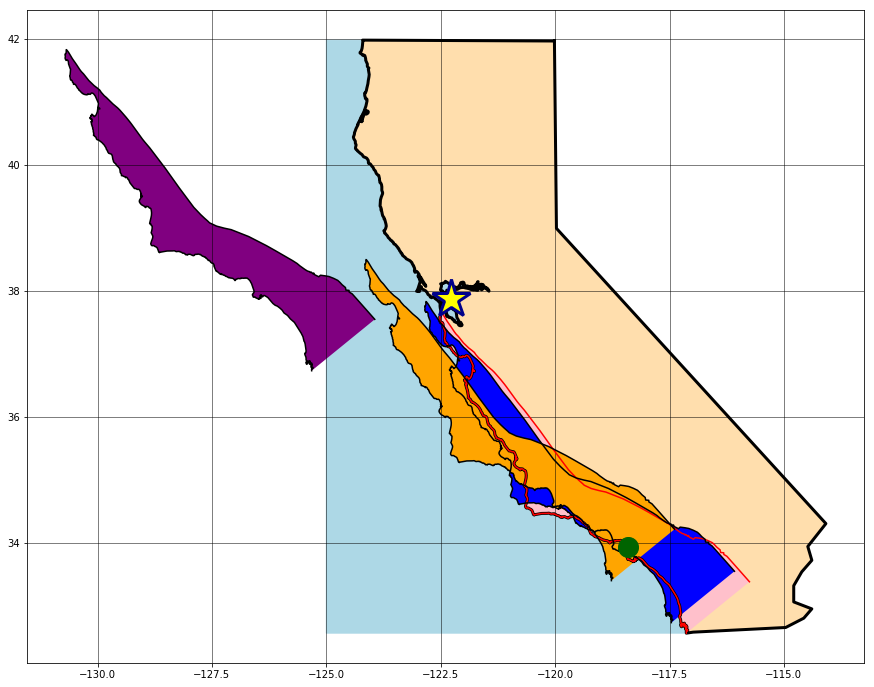

In [18]:
# Part 3a

plate1=np.array(plate)
plate5=np.array(plate)
plate25=np.array(plate)


logiSpeed=.035*np.cos(np.radians(32))
latSpeed=.035*np.sin(np.radians(32))
Time=10**6
latTraveled=latSpeed*Time
logiTraveled=logiSpeed*Time


        
for i in range(0 ,np.size(plate)//2 ):
    plate1[i,0]=plate1[i,0]*np.pi*R*np.cos(np.radians(35.5))/180-logiTraveled
    plate1[i,1]=plate1[i,1]*2*np.pi*R/360+latTraveled
    
for i in range(0 ,np.size(plate)//2 ):
    plate1[i,0]=plate1[i,0]/((np.pi*R*np.cos(np.radians(35.5)))/180)
    plate1[i,1]=plate1[i,1]/(2*np.pi*R/360)
    #converting back to lat/logi
    
    
Time=5*10**6
latTraveled=latSpeed*Time
logiTraveled=logiSpeed*Time    
for i in range(0 ,np.size(plate)//2 ):
    plate5[i,0]=plate5[i,0]*np.pi*R*np.cos(np.radians(35.5))/180-logiTraveled
    plate5[i,1]=plate5[i,1]*2*np.pi*R/360+latTraveled
    
for i in range(0 ,np.size(plate)//2 ):
    plate5[i,0]=plate5[i,0]/((np.pi*R*np.cos(np.radians(35.5)))/180)
    plate5[i,1]=plate5[i,1]/(2*np.pi*R/360)
    #converting back to lat/logi

    
Time=25*(10**6)
latTraveled=latSpeed*Time
logiTraveled=logiSpeed*Time    
for i in range(0 ,np.size(plate)//2 ):
    plate25[i,0]=plate25[i,0]*np.pi*R*np.cos(np.radians(35.5))/180-logiTraveled
    plate25[i,1]=plate25[i,1]*2*np.pi*R/360+latTraveled
    
for i in range(0 ,np.size(plate)//2 ):
    plate25[i,0]=plate25[i,0]/((np.pi*R*np.cos(np.radians(35.5)))/180)
    plate25[i,1]=plate25[i,1]/(2*np.pi*R/360)
    #converting back to lat/logi
    
    
        
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')


plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(plate1[:,0],plate1[:,1],'k-')
plt.fill(plate1[:,0],plate1[:,1],'blue')

plt.plot(plate5[:,0],plate5[:,1],'k-')
plt.fill(plate5[:,0],plate5[:,1],'orange')

plt.plot(plate25[:,0],plate25[:,1],'k-')
plt.fill(plate25[:,0],plate25[:,1],'purple')



plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()        


In [19]:
# Part 3b

newPlate=np.array(plate)
campusCoord=37+52/60+19.54/3600
campusCoord=campusCoord*2*np.pi*R/360
LAXcoord=33+56/60+38.89/3600
LAXcoord=LAXcoord*2*np.pi*R/360

TimeRange=[ 23*10**6 ,23.5*10**6 , 24*10**6,  24.5*10**6  , 25*10**6 ,30*10**6]
for i in range(0,6):
    latTraveled=latSpeed*TimeRange[i]
    changedLAXcoord=LAXcoord+latTraveled
    if changedLAXcoord<= campusCoord +.001*campusCoord and changedLAXcoord>=campusCoord -.001*campusCoord:
        TimeOfSameLat=TimeRange[i]   
print(TimeOfSameLat)

        


23500000.0
